<a href="https://colab.research.google.com/github/taruma/inkovis/blob/master/notebook/inkovis_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INKOVIS

Buku (_jupyter notebook_) ini hanya digunakan untuk memvisualisasikan data.

Informasi lebih lanjut kunjungi _github repository_ [taruma/inkovis](https://github.com/taruma/inkovis).

# INISIASI BUKU

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DATASET

In [2]:
ALAMAT_DATASET_EXCEL = 'https://github.com/taruma/inkovis/raw/master/dataset/data_infeksi_covid19_indonesia.xlsx'

In [3]:
raw_dataset = pd.read_excel(ALAMAT_DATASET_EXCEL, index_col=0, parse_dates=True)
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2020-02-18 to 2020-03-24
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   jumlah_periksa   36 non-null     int64 
 1   positif          36 non-null     int64 
 2   sembuh           36 non-null     int64 
 3   meninggal        36 non-null     int64 
 4   negatif          36 non-null     int64 
 5   proses_periksa   36 non-null     int64 
 6   kasus_perawatan  36 non-null     int64 
 7   catatan          6 non-null      object
dtypes: int64(7), object(1)
memory usage: 2.5+ KB


In [4]:
raw_dataset.tail()

,jumlah_periksa,positif,sembuh,meninggal,negatif,proses_periksa,kasus_perawatan,catatan
tanggal,,,,,,,,
2020-03-20,2028,369,17,32,1643,18,0,NaN
2020-03-21,2365,450,20,38,1895,22,0,NaN
2020-03-22,2483,579,30,49,1904,0,500,"tidak tersedia PDF, diambil dari tampilan pada..."
2020-03-23,2756,579,30,49,2177,0,500,NaN
2020-03-24,3332,686,30,55,2625,0,601,"(informasi kasus perawatan diambil pada situs,..."


In [5]:
dataset = raw_dataset.drop('catatan', axis=1)
dataset.head()

,jumlah_periksa,positif,sembuh,meninggal,negatif,proses_periksa,kasus_perawatan
tanggal,,,,,,,
2020-02-18,112,0,0,0,110,2,0
2020-02-19,114,0,0,0,112,2,0
2020-02-20,118,0,0,0,116,2,0
2020-02-21,121,0,0,0,121,0,0
2020-02-22,121,0,0,0,121,0,0


# VISUALISASI DATA

In [6]:
FIG_SIZE = (20, 8)

## JUMLAH KASUS POSITIF COVID-19 DI INDONESIA

### Kode

In [7]:
def plot_covid_case(
    dataset, ax, mask=None, days=1, 
    text_left=None, text_right=None
    ):

    slice_data = (
        slice(None, None, days) if mask is None else slice(*mask, days)
    )

    data = dataset[slice_data]

    date_index = data.index

    date_ticks = date_index.strftime('%d\n%b').to_list()

    rows, cols = data.shape

    total_confirmed = data['positif'].values
    total_recovered = data['sembuh'].values
    total_deaths = data['meninggal'].values

    total_positive = total_confirmed - total_recovered - total_deaths

    x_pos = np.arange(0, rows*2, 2)
    x_pos_diff = x_pos[:-1] + 1

    # LINE
    ax.plot(
        x_pos, total_confirmed,
        color='blue', linestyle='--', 
        marker='o', markerfacecolor='orange')

    # BAR
    ## POSITIVE
    ax.bar(
        x_pos, total_positive, bottom=total_deaths+total_recovered,
        color='orange', label='Positif COVID-19'
    )

    ## RECOVERED
    ax.bar(
        x_pos, total_recovered, bottom=total_deaths,
        color='green', label='Sembuh (Positif COVID-19)'
    )

    ## DEATHS
    ax.bar(
        x_pos, total_deaths,
        color='red', label='Meninggal (Positif COVID-19)'
    )

    # DIFF

    diff_confirmed = np.diff(total_confirmed)
    diff_deaths = np.diff(total_deaths)
    diff_recovered = np.diff(total_recovered)
    diff_positive = np.diff(total_positive)

    # BAR (DIFF)
    ## DEATHS
    ax.bar(
        x_pos_diff, diff_deaths,
        bottom=total_confirmed[:-1],
        color='red', edgecolor='black', alpha=0.5
    )

    ## RECOVERED
    ax.bar(
        x_pos_diff, diff_recovered,
        bottom=total_confirmed[:-1]+diff_deaths,
        color='green', edgecolor='black', alpha=0.5
    )

    ## POSITIVE
    ax.bar(
        x_pos_diff, diff_positive,
        bottom=total_confirmed[:-1]+diff_deaths+diff_recovered,
        color='orange', edgecolor='black', alpha=0.5
    )

    # ANNOTATION
    ann_space = 10*5 + 5

    for i, val in enumerate(total_confirmed):
        text = f'{total_positive[i]}\n{total_recovered[i]}\n{total_deaths[i]}'

        # TOTAL CASE
        ax.annotate(
            text, (x_pos[i], val), xytext=(0, 10),
            textcoords='offset points',
            ha='center', va='bottom', size=10,
            bbox=dict(
                facecolor='white', alpha=0.7, boxstyle='square'
            )
        )

        ax.annotate(
            f'{val}', (x_pos[i], val), xytext=(0, ann_space),
            textcoords='offset points',
            ha='center', va='bottom', 
            size=12, color='white', fontweight='bold',
            bbox=dict(
                facecolor='red', alpha=0.7, boxstyle='round'
            )           
        )

        # TEXT DIFF
        if i > 0:
            text_diff = (
                f'{diff_positive[i-1]}\n{diff_recovered[i-1]}' + 
                f'\n{diff_deaths[i-1]}')
            ax.annotate(
                text_diff, 
                (x_pos[i]-1, val), xytext=(0,10),
                textcoords='offset points',
                ha='center', va='bottom', size=10,
                bbox=dict(facecolor='gray', alpha=0.1, boxstyle='square')
            )

            ax.annotate(
                f'{total_confirmed[i]-total_confirmed[i-1]}',
                (x_pos[i]-1, val), xytext=(0,ann_space),
                textcoords='offset points',
                ha='center', va='bottom', size=10,
                bbox=dict(facecolor='red', alpha=0.3, boxstyle='round')
            )

    # INFO

    text_right = (
        'Data: infeksiemerging.kemkes.go.id' if text_right is None else
        text_right
    )
    ax.text(
        1, -0.1, text_right,
        horizontalalignment='right',
        verticalalignment='top', style='normal', family='monospace',
        transform = ax.transAxes
    )

    text_left = (
        '' if text_left is None else
        text_left
    )

    ax.text(
        0, -0.1, text_left,
        horizontalalignment='left',
        verticalalignment='top', style='normal', family='serif',
        transform = ax.transAxes
    )

    # LEGEND
    ax.set_xticks(x_pos)
    ax.grid(True, axis='both')
    ax.set_xticklabels(date_ticks, rotation=0)
    ax.set_title('KASUS POSITIF COVID-19 DI INDONESIA', fontsize='x-large', fontweight='bold')
    ax.set_xlabel('Tanggal', fontsize=14)
    ax.set_ylabel('Jumlah Kasus', fontsize=14)
    ax.set_ylim(0, round(max(total_confirmed)+200, -2))
    ax.legend(loc='upper left')
    ax.margins(x=0.01)

    plt.tight_layout()

### GRAFIK

#### Bulan Maret, Setiap Hari

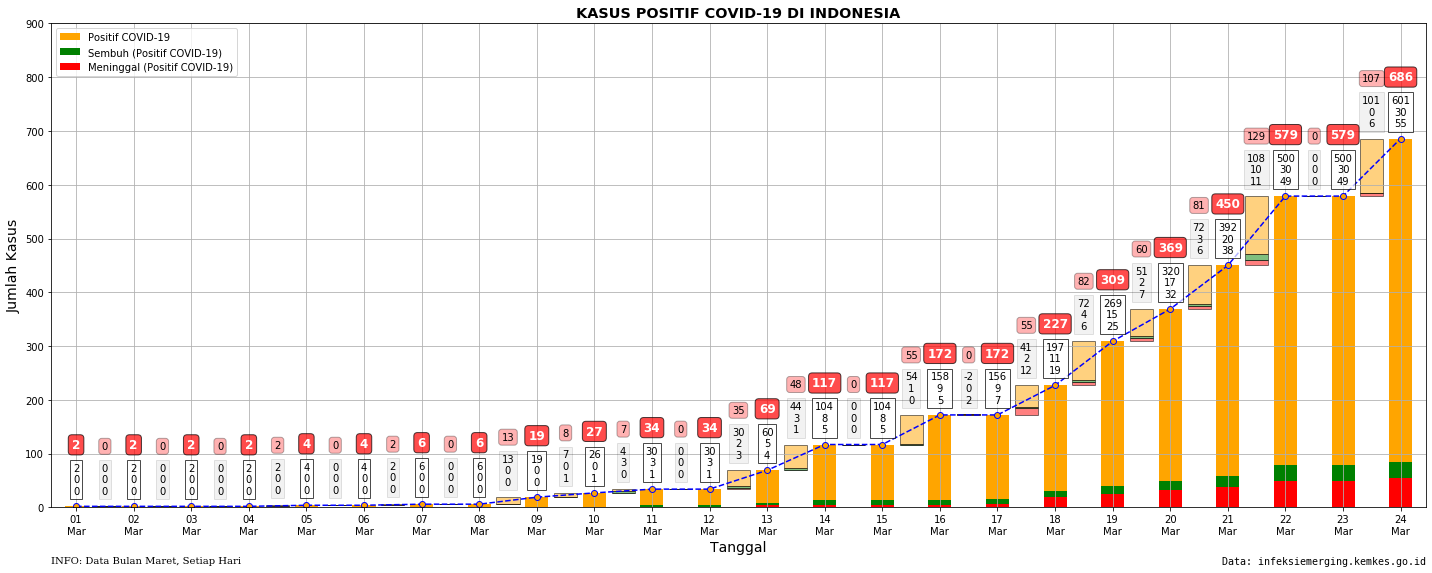

In [8]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

plot_covid_case(raw_dataset, ax, mask=('2020-03','2020-03'), days=1,
                text_left='INFO: Data Bulan Maret, Setiap Hari')
plt.savefig('GRAFIK_KASUS_POSITIF_MARET_HARIAN.png',dpi=150)

#### Sejak Maret, Per 2 Hari

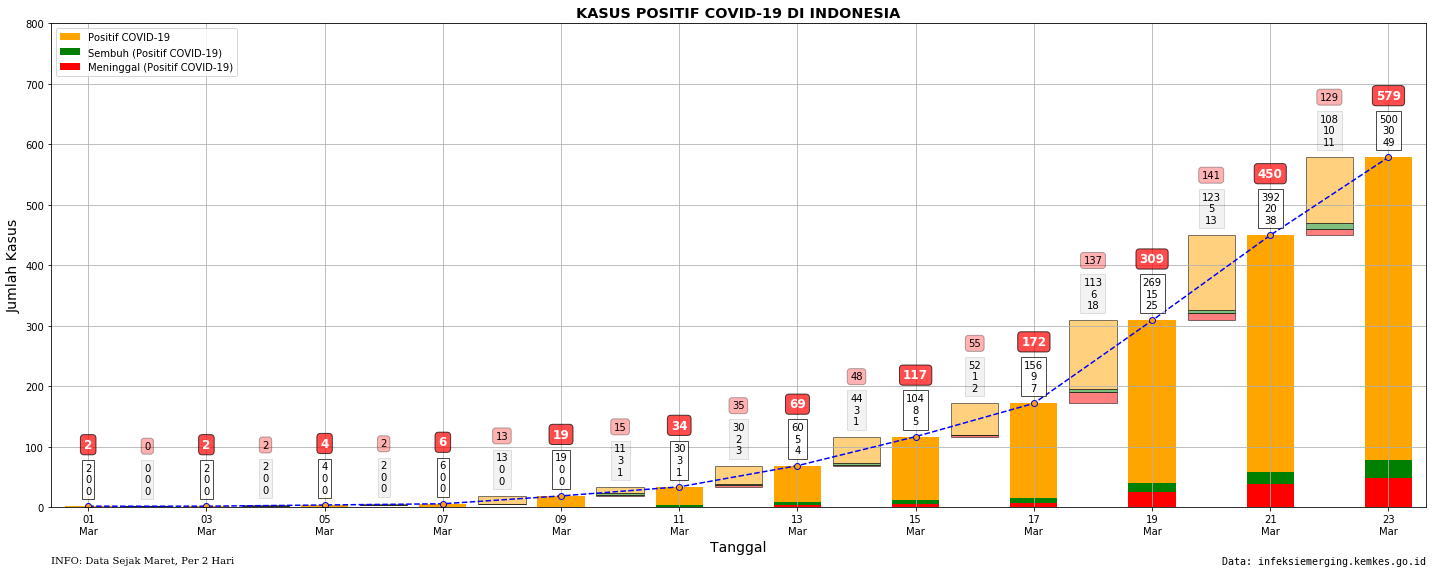

In [9]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

plot_covid_case(raw_dataset, ax, mask=('2020-03', None), days=2,
                text_left="INFO: Data Sejak Maret, Per 2 Hari")
plt.savefig('GRAFIK_KASUS_POSITIF_MARET_DUA_HARI.png',dpi=150)

#### Periode Tanggal 11 Maret sampai 24 Maret, Setiap Hari

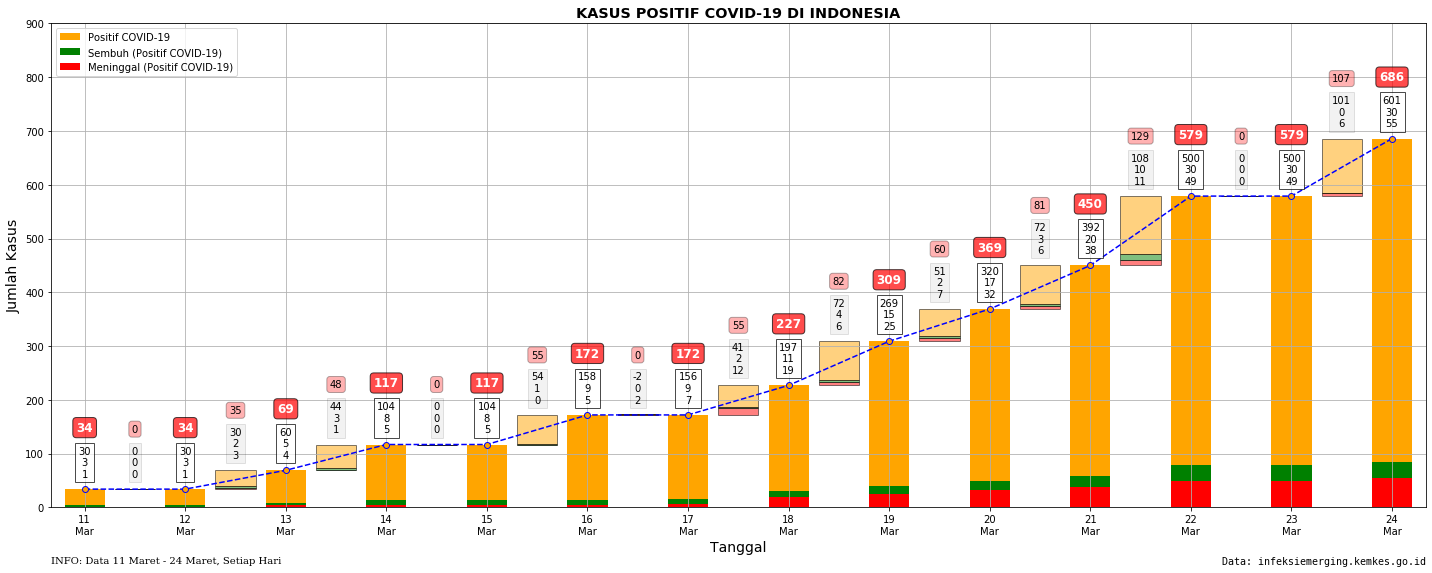

In [10]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

plot_covid_case(raw_dataset, ax, mask=('2020-03-11', '2020-03-24'), days=1, text_left='INFO: Data 11 Maret - 24 Maret, Setiap Hari')
plt.savefig('GRAFIK_KASUS_POSITIF_11_24_MARET_HARIAN.png',dpi=150)

## JUMLAH SPESIMEN/PENGUJIAN

In [11]:
def plot_covid_test(
    dataset, ax, mask=None, days=1,
    text_left=None, text_right=None,
    show_number=False, show_diff=False
    ):

    slice_data = (
        slice(None, None, days) if mask is None else slice(*mask, days)
    )

    data = dataset[slice_data]
    date_index = data.index
    date_ticks = date_index.strftime('%d\n%b').to_list()
    rows, _ = data.shape

    total_tests = data['jumlah_periksa'].values
    total_positive = data['positif'].values
    total_negative = data['negatif'].values
    total_checks = data['proses_periksa'].values

    x_pos = np.arange(0, rows*2, 2)
    x_pos_diff = x_pos[:-1] + 1

    # LINE
    ax.plot(
        x_pos, total_tests,
        color='blue', linestyle='--',
        marker='o', markerfacecolor='orange'
    )

    # BAR
    ## POSITIVE
    ax.bar(
        x_pos, total_positive, bottom=total_negative+total_checks,
        color='red', label='POSITIF COVID-19'
    )

    ## NEGATIVE
    ax.bar(
        x_pos, total_negative, bottom=total_checks,
        color='orange', label='NEGATIF COVID-19'
    )

    ## CHECKS
    ax.bar(
        x_pos, total_checks,
        color='yellow', label='PROSES PEMERIKSAAN'
    )

    # DIFF
    diff_tests = np.diff(total_tests)
    diff_positive = np.diff(total_positive)
    diff_negative = np.diff(total_negative)
    diff_checks = np.diff(total_checks)

    # BAR DIFF
    ## CHECKS
    ax.bar(
        x_pos_diff, diff_checks,
        bottom=total_tests[:-1],
        color='yellow', edgecolor='black', alpha=0.5
    )

    ## NEGATIVE
    ax.bar(
        x_pos_diff, diff_negative,
        bottom=total_tests[:-1]+diff_checks,
        color='orange', edgecolor='black', alpha=0.5
    )

    ## POSITIVE
    ax.bar(
        x_pos_diff, diff_positive,
        bottom=total_tests[:-1]+diff_checks+diff_negative,
        color='red', edgecolor='black', alpha=0.5
    )

    # ANNOTATION
    ann_space = 10*5 + 5

    if show_number:
        for i, val in enumerate(total_tests):
            text = f'{total_positive[i]}\n{total_negative[i]}\n{total_checks[i]}'

            # TOTAL TESTS
            ax.annotate(
                text, (x_pos[i], val), xytext=(0, 10),
                textcoords='offset points',
                ha='center', va='bottom', size=10,
                bbox=dict(
                    facecolor='white', alpha=0.7, boxstyle='square'
                )
            )

            ax.annotate(
                f'{val}', (x_pos[i], val), xytext=(0, ann_space),
                textcoords='offset points',
                ha='center', va='bottom', size=12,
                color='white', fontweight='bold',
                bbox=dict(
                    facecolor='blue', alpha=0.7, boxstyle='round'
                )
            )
            
            # TEXT DIFF
            if i > 0 and show_diff:
                text_diff = (
                    f'{diff_positive[i-1]}\n{diff_negative[i-1]}' +
                    f'\n{diff_checks[i-1]}'
                )
                
                y_pos_diff = val if val > total_tests[i-1] else total_tests[i-1] 

                ax.annotate(
                    text_diff,
                    (x_pos[i]-1, y_pos_diff), xytext=(0,10),
                    textcoords='offset points',
                    ha='center', va='bottom', size=10,
                    bbox=dict(
                        facecolor='gray', alpha=0.1, boxstyle='square'
                    )
                )

                ax.annotate(
                    f'{total_tests[i]-total_tests[i-1]}',
                    (x_pos[i]-1, y_pos_diff), xytext=(0, ann_space),
                    textcoords='offset points',
                    ha='center', va='bottom', size=10,
                    bbox=dict(
                        facecolor='blue', alpha=0.3, boxstyle='round'
                    )
                )


    # INFO

    text_right = (
        'Data: infeksiemerging.kemkes.go.id' if text_right is None else
        text_right
    )
    ax.text(
        1, -0.1, text_right,
        horizontalalignment='right',
        verticalalignment='top', style='normal', family='monospace',
        transform = ax.transAxes
    )

    text_left = (
        '' if text_left is None else
        text_left
    )

    ax.text(
        0, -0.1, text_left,
        horizontalalignment='left',
        verticalalignment='top', style='normal', family='serif',
        transform = ax.transAxes
    )

    # LEGEND
    ax.set_xticks(x_pos)
    ax.grid(True, axis='both')
    ax.set_xticklabels(date_ticks, rotation=0)
    ax.set_title('JUMLAH SPESIMEN/UJI COVID-19 DI INDONESIA', fontsize='x-large', fontweight='bold')
    ax.set_xlabel('Tanggal', fontsize=14)
    ax.set_ylabel('Jumlah Kasus', fontsize=14)
    ax.set_ylim(0, round(max(total_tests)+1000, -2))
    ax.legend(loc='upper left')
    ax.margins(x=0.01)

    plt.tight_layout()

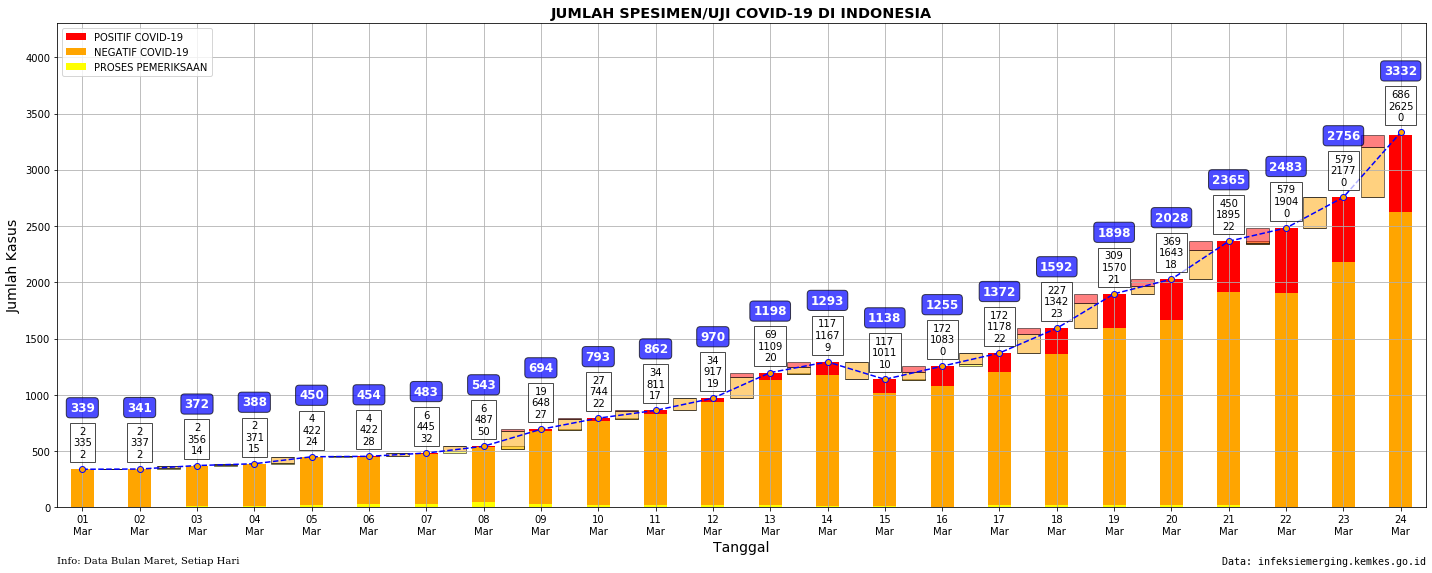

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))

plot_covid_test(raw_dataset, ax, mask=('2020-03', None), show_number=True, text_left="Info: Data Bulan Maret, Setiap Hari")
plt.savefig('GRAFIK_JUMLAH_SPESIMEN_MARET.png', dpi=150)

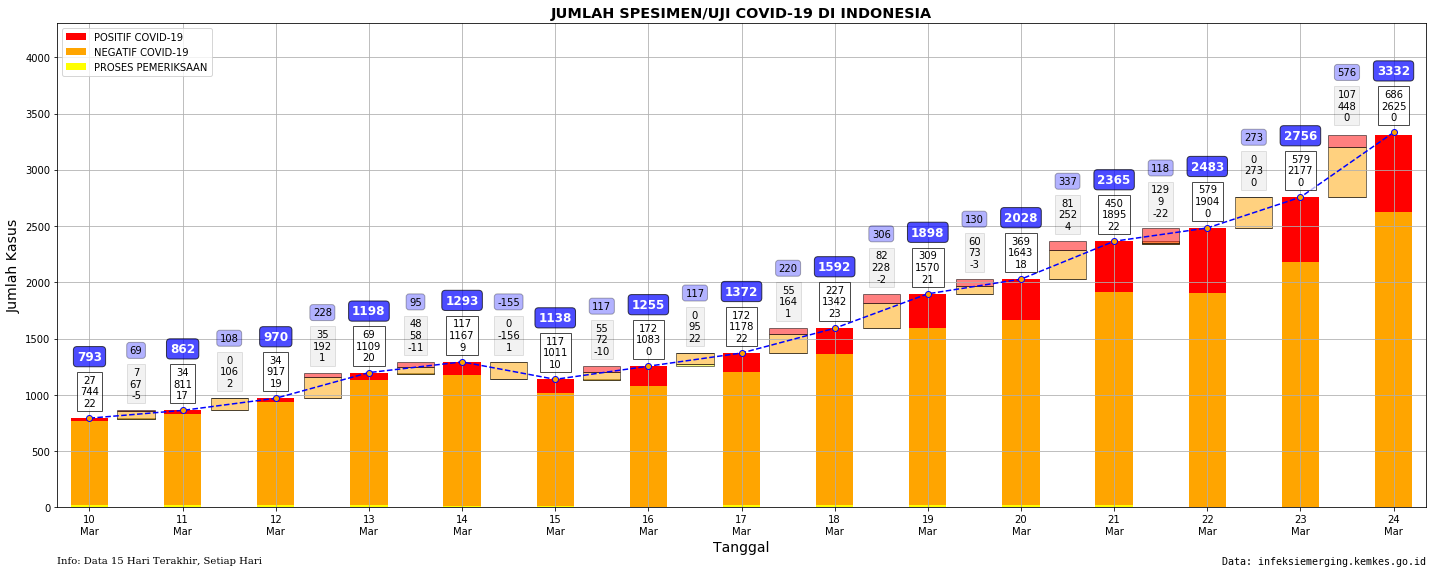

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))

plot_covid_test(raw_dataset[-15:], ax, show_number=True, show_diff=True, text_left="Info: Data 15 Hari Terakhir, Setiap Hari")
plt.savefig('GRAFIK_JUMLAH_SPESIMEN_15_HARI_TERAKHIR.png', dpi=150)

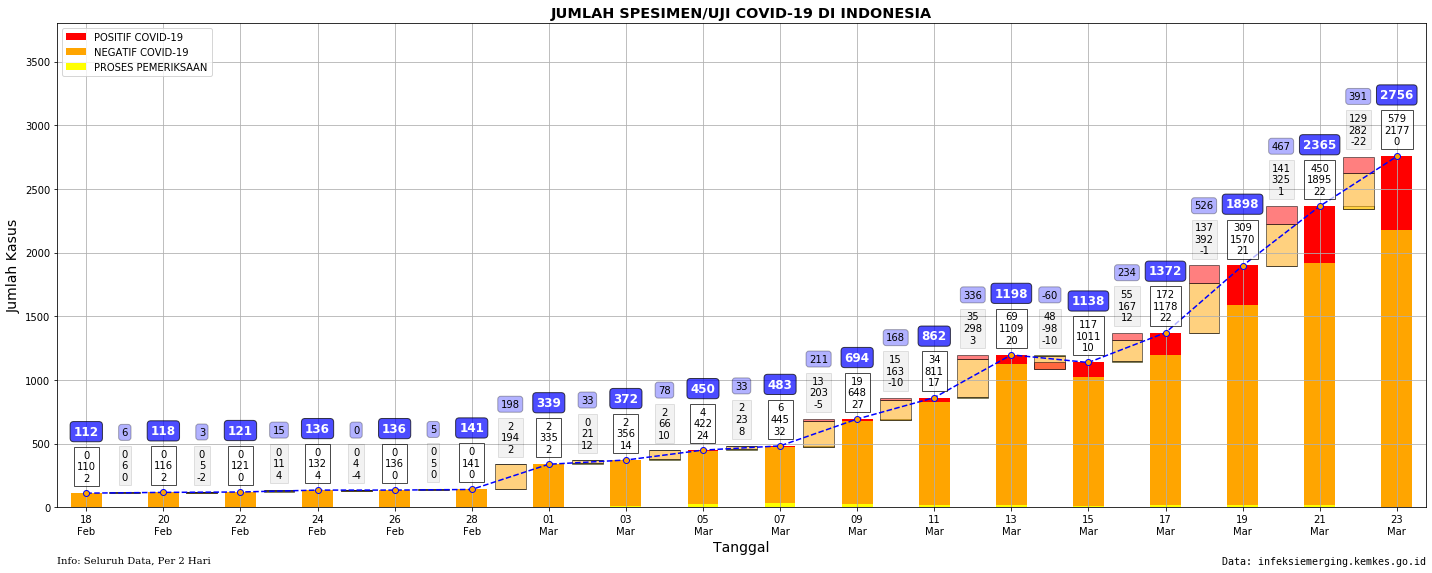

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))

plot_covid_test(raw_dataset, ax, days=2, show_number=True, show_diff=True, text_left="Info: Seluruh Data, Per 2 Hari")
plt.savefig('GRAFIK_JUMLAH_SPESIMEN_15_HARI_TERAKHIR.png', dpi=150)